# Convolutional Neural Networks (CNNs)
A CNN is a type of deep learning model designed to process and understand visual data, such as images and videos. It is inspired by the human visual system and uses layers of learned filters to automatically detect and recognize patterns and features in images.

## CNN vs. Dense Network

You can also build a image recognition classification model using dense layers with the output layer using sigmoid or softmax activation, so what makes CNNs so much better for this same problem?

Convolutional Neural Networks (CNNs) are preferred for image recognition and classification tasks over simple dense neural networks for several reasons:

>1. **Spatial Hierarchies:** CNNs are designed to capture spatial hierarchies and patterns in images. They have built-in mechanisms to detect features at different scales and spatial locations.

>2. **Parameter Sharing:** CNNs use weight sharing through convolutional layers. This reduces the number of parameters compared to fully connected dense layers, making the model more efficient and less prone to overfitting (better generalization). Dense layers, on the other hand, have a separate weight for each connection.

>3. **Translation Invariance:** CNNs are translation-invariant, meaning they can recognize patterns regardless of their exact position in the image. This is achieved through convolutional layers and pooling layers.

>4. **Feature Extraction:** CNNs automatically learn to extract features from the data. In contrast, in a dense network, you must manually engineer features from raw pixel values, which is a complex and time-consuming process.

>5. **Robustness to Variability:** CNNs are robust to variations such as rotation, scaling, and small distortions. Dense networks, which rely on raw pixel values, may not handle these variations as effectively.

>6. **Convolutional and Pooling Layers:** CNNs have convolutional layers that apply convolution operations to the input image, followed by pooling layers that downsample the features. These layers help reduce the dimensionality and computational requirements of the network while preserving critical information.

>7. **Pretrained Models:** CNNs benefit from pretrained models on large datasets like ImageNet. Transfer learning allows you to use a pre-trained CNN as a feature extractor and fine-tune it for your specific task.

>8. **Sparse Connectivity:** CNNs typically have sparse connectivity patterns, which means each unit in a layer is connected to only a subset of units in the previous layer. This allows the network to focus on relevant features and reduces the computational load.

>9. **Scalability:** CNNs are scalable and can handle a wide range of image sizes. You can use them for small images and large images without significantly altering the architecture.

## Breaking Down the `tf.keras.layers.Conv2D()` Layer

A typical convolutional layer in tensorflow will look like this:<br>
> `tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='same')`

What does this mean?<br>
1. *Filters*
>* Filters are the neurons of a convolutional layer. Each filter will have a unique feature map. One filter may exagerate the vertical lines in an image. This filter will have it's own trainable weight and bias. Another filter may exagerate the horizontal lines in an image and will also have it's own trainable weight and bias term. The neural network will automatically detect filters that are important to the problem and will define them throughout training.
>* Typical values are: 10, 32, 64, 128, etc. The higher the filters the more complex the model will be.

2. *Kernel Size* (Filter Size)
>* Kernel size determines the amount of pixels analyzed at one time. The size of the kernel takes the sum of the dot product of each matrix in order to learn.
>* Typical values are 3, 5, 7 where smaller values allow the model to learn smaller, more detailed patterns while larger numbers tend to be more efficient and more generalized.

3. *Strides*
>* Stride refers to how far the kernel shifts after each computation. A higher stride would result in more efficient computations with less data learned on the images.

4. *Padding*
>* There are two main types: valid and same.
>* `padding='same'` is when we add zeros to the image so that the output image is the same size as the input.
>* `padding='valid'` does not add padding. That would mean in an image of width 11, the kernel would cut off the last two pixels in every row, not considering them in the final prediction. Essentially, it would only consider the image as a width of 9 instead of 11. This is useful to reduce computation as typically the edges of images don't provide much useful information anyways.

## Breaking Down the `tf.keras.layers.MaxPool2D()` Layer

Pooling layers *subsample* (shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting).

>* A pooling layer of `pool_size=(2, 2)` takes input from the convolution layer's output and keeps the aggregation value from each 2x2 iteration further reducing the output size to 1x1 from 2x2.<br>
>* **Translation Invariance:** Pooling Layers provide a form of translation invariance by extracting the most important features from different spatial locations, making the model more robust to variations in the position of the features.

## Additional Resources

1. Another great resource for understanding CNNs is the 'CNN Explainer' website. It can be found [here.](https://poloclub.github.io/cnn-explainer/)
2. To stay up to date on the latest advancements in machine learning/deep learning can be found on [paperswithcode.com/sota](https://paperswithcode.com/sota)

# Import Libraries and Functions

In [1]:
import zipfile
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [2]:
def plot_loss_curves(df, model, test_data, y_lim=(0, 1)):
  score = model.evaluate(test_data, verbose=False)
  metric = model.metrics_names[1].capitalize()
  print(f"Test Loss ({str(model.loss).split('.')[-1].split(' ')[0]}): {round(score[0], 3)}\n"
        f"Test Score ({metric}): {round(score[1], 3)}\n\n")
  pd.DataFrame(df.history).plot(figsize=(9,7), grid=True, xlabel="Epoch",
                                        style=["b-", "b--.", "r-", "r--."],
                                        ylim = y_lim)
  plt.title("Loss Curves")
  plt.legend(["Train Loss", f"Train {metric}", "Test Loss", f"Test {metric}"])
  plt.show()

In [3]:
def view_random_image(target_dir, target_class):
  # Setup the target directory where we will view images from
  target_folder = target_dir + "/" + target_class
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plit it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image and shape: '{random_image[0]}', {img.shape}\n")
  plt.show()

In [4]:
def load_and_prep(filename, img_shape=224):
  """
  Reads an image from a filename, turns it into a tensor, and reshapes it to (img_shape, img_shape, color_channel)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize and scale the img
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [5]:
def prediction_confidence(model, filename):
  preds = model.predict(tf.expand_dims(load_and_prep(filename, 224), axis=0), verbose=False)
  conf = np.abs(0.5 - preds[0, 0])*2
  formatted_conf = "{:.1%}".format(conf)
  return formatted_conf

In [6]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, make a prediction with model and plots
  the image with the predicted class as the title.
  """
  # Import the the target file
  img = load_and_prep(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0), verbose=False)
  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  # Plot the image with the predicted class as the title
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} ({prediction_confidence(model=model, filename=filename)} confident)")
  plt.axis(False)
  plt.imshow(img)

# Binary Classification

## Get the Data

The images we are working with is from the Foods 101 dataset, which is 101 classes of different types of food. https://www.kaggle.com/dansbecker/food-101

However, it's been modified to only include two classes to start with a binary classification problem (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learing/blob/main/extras/image_data_modification.ipynb

**NOTE:** Start with a smaller dataset to make mistakes quickly. Once we are confident we can scale up to include more classes

In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-01 14:18:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.3MB/s    in 6.2s    

2024-02-01 14:18:26 (16.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Exploratory Data Analysis (EDA)
The goal of this phase is to become "one with the data".

In [8]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [9]:
# Create a list of class names that we are trying to predict
data_dir = pathlib.Path("pizza_steak/test")
# Create a list of class names from sub_directories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


Image and shape: '1870865.jpg', (512, 512, 3)



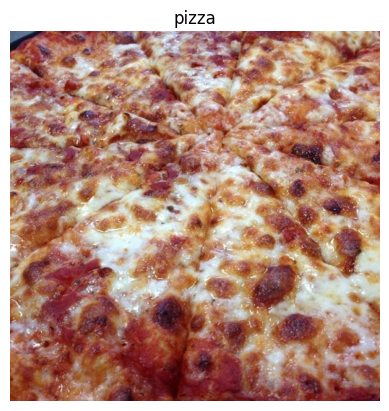

In [10]:
# Let's visualize our images
view_random_image("pizza_steak/train", "pizza")

**NOTE:** remember that a 3-D array represents it's shape as (x, y, z). So for these pictures, there are 512 rows of pixels, 512 columns of pixels (may vary).
>For reference, a 1080p image would be represented as 1920 rows and 1080 columns.

The z-axis in this case represents the layers. There are three for a standard RGB color scale. So there is one layer of 512x512 pixels for green, another for red, and another for blue. So, the total number of elements in one image would be:
>Total number of elements = 512 x 512 x 3 = <u>786,432</u>

In [11]:
# Let's view a random image as an array
dir = "pizza_steak/train/pizza"
random_image = random.sample(os.listdir(dir), 1)
img = mpimg.imread(dir + "/" + random_image[0])
print(f"Image from: {dir}/{random_image[0]}\nShape: {img.shape}\n")
print(img)

Image from: pizza_steak/train/pizza/2989328.jpg
Shape: (384, 512, 3)

[[[ 12   8   9]
  [ 10   6   7]
  [  8   4   3]
  ...
  [  5   5   7]
  [  6   6   8]
  [  6   6   8]]

 [[ 13   9  10]
  [ 12   8   9]
  [ 10   6   5]
  ...
  [  6   6   8]
  [  6   6   8]
  [  6   6   8]]

 [[ 12   8   7]
  [ 10   6   5]
  [  8   4   3]
  ...
  [  6   6   8]
  [  7   7   9]
  [  7   7   9]]

 ...

 [[ 10   6   3]
  [  8   4   1]
  [  8   4   1]
  ...
  [ 99  89  80]
  [101  88  80]
  [ 99  86  78]]

 [[ 10   6   3]
  [  8   4   1]
  [  8   4   1]
  ...
  [108  98  89]
  [108  95  87]
  [ 91  78  70]]

 [[ 11   7   4]
  [  9   5   2]
  [  8   4   1]
  ...
  [ 88  78  69]
  [ 88  75  67]
  [ 86  73  65]]]


In [12]:
# What are the min and max values?
print(f"Maximum value: {img.max()}\nMinimum value: {img.min()}")

Maximum value: 255
Minimum value: 0


**NOTE:** many machine learning models, including neural networks, prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255 (since 255 is the max value).

In [13]:
img / 255.

array([[[0.04705882, 0.03137255, 0.03529412],
        [0.03921569, 0.02352941, 0.02745098],
        [0.03137255, 0.01568627, 0.01176471],
        ...,
        [0.01960784, 0.01960784, 0.02745098],
        [0.02352941, 0.02352941, 0.03137255],
        [0.02352941, 0.02352941, 0.03137255]],

       [[0.05098039, 0.03529412, 0.03921569],
        [0.04705882, 0.03137255, 0.03529412],
        [0.03921569, 0.02352941, 0.01960784],
        ...,
        [0.02352941, 0.02352941, 0.03137255],
        [0.02352941, 0.02352941, 0.03137255],
        [0.02352941, 0.02352941, 0.03137255]],

       [[0.04705882, 0.03137255, 0.02745098],
        [0.03921569, 0.02352941, 0.01960784],
        [0.03137255, 0.01568627, 0.01176471],
        ...,
        [0.02352941, 0.02352941, 0.03137255],
        [0.02745098, 0.02745098, 0.03529412],
        [0.02745098, 0.02745098, 0.03529412]],

       ...,

       [[0.03921569, 0.02352941, 0.01176471],
        [0.03137255, 0.01568627, 0.00392157],
        [0.03137255, 0

## Preprocess our Images for Modeling

### Create Train/Test Datasets

In [14]:
# Setup path to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

**NOTE:** We need to turn our data into batches. A batch is a small subset of data. Rather than looking at all 10,000 images at one time, for example, a model might only look at 32 at a time (the default batch size).

It does this for a couple reasons:
>1. 10,000 (or more) images might not fit into the memory of your processor (GPU)<br>
>2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [15]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Load in our images from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Create Augmented Train/Test Datasets

In [17]:
# Recreate ImageDataGenerator training instance
train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                       rotation_range=0.2,
                                       shear_range=0.5,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True
                                       )
# Create ImageDataGenerator test instance without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       shuffle=True,
                                                      )

Augmented training data
Found 1500 images belonging to 2 classes.


### Create Super Train/Test Datasets
This includes augmented images written to the train directories. Rather than 1500 images it contains 3000 images.

In [19]:
# Configure how we want to augment the images (we will rescale during training)
train_datagen_aug = ImageDataGenerator(rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True
                                       )

# Load original pizza images from the source directory
write_pizza_generator = train_datagen_aug.flow_from_directory(
    "pizza_steak/train",
    target_size=(224, 224),
    batch_size=32,
    classes=['pizza'],
    save_to_dir="pizza_steak/train/pizza",
    save_prefix='aug_',
    save_format='jpeg'
)

# Load original steak images from the source directory
write_steak_generator = train_datagen_aug.flow_from_directory(
    "pizza_steak/train",
    target_size=(224, 224),
    batch_size=32,
    classes=['steak'],
    save_to_dir="/content/pizza_steak/train/steak",
    save_prefix='aug_',
    save_format='jpeg'
)

Found 750 images belonging to 1 classes.
Found 750 images belonging to 1 classes.


In [20]:
# Generate and save 1500 augmented images
for i in range(24):
    batch = write_pizza_generator.next()
    batch2 = write_steak_generator.next()

In [21]:
# Now create our super train dataset
supertrain_datagen = ImageDataGenerator(rescale=1./255)
supertrain_data = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    classes=['pizza', 'steak'],
                                                    class_mode='binary',
                                                    shuffle=True,
                                                    seed=42)

Found 3000 images belonging to 2 classes.


## Binary Modeling
Below will be a collapsable section for all the model experiments we will run

### Create a Baseline Model
>In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required, e.g. do some research on which model is performing best in the field.<br><br>
>A good starting place for research the best architectures is [paperswithcode.com/sota](https://paperswithcode.com/sota)

For the sake of understanding the difference between a dense network and a CNN, let's start with a dense network.

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Define the model
dense_network = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
dense_network.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure model callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]
# 4. Fit the model
dense_network_h = dense_network.fit(train_data,
                            epochs=100,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/100
47/47 [==============================] - 10s 147ms/step - loss: 6.3529 - accuracy: 0.6213 - val_loss: 1.2363 - val_accuracy: 0.7520
Epoch 2/100
47/47 [==============================] - 5s 116ms/step - loss: 1.5202 - accuracy: 0.7040 - val_loss: 0.6800 - val_accuracy: 0.7880
Epoch 3/100
47/47 [==============================] - 6s 129ms/step - loss: 1.8523 - accuracy: 0.6927 - val_loss: 1.0197 - val_accuracy: 0.7820
Epoch 4/100
47/47 [==============================] - 5s 113ms/step - loss: 1.1754 - accuracy: 0.7200 - val_loss: 2.2445 - val_accuracy: 0.5920
Epoch 5/100
47/47 [==============================] - 6s 132ms/step - loss: 0.8369 - accuracy: 0.7680 - val_loss: 0.6461 - val_accuracy: 0.7380
Epoch 6/100
47/47 [==============================] - 5s 115ms/step - loss: 0.5705 - accuracy: 0.8007 - val_loss: 0.7304 - val_accuracy: 0.7480
Epoch 7/100
47/47 [==============================] - 6s 128ms/step - loss: 0.3838 - accuracy: 0.8353 - val_loss: 1.8992 - val_accuracy: 0.558

Test Loss (BinaryCrossentropy): 0.646
Test Score (Accuracy): 0.738




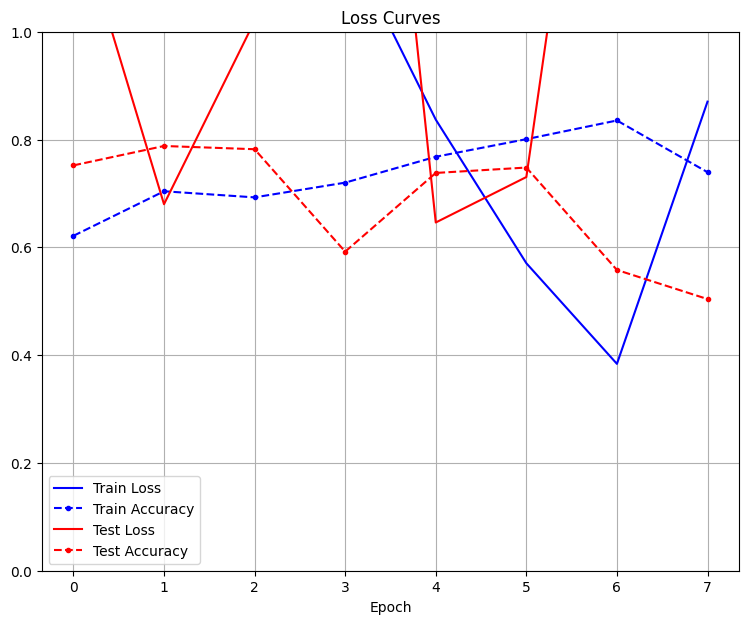

In [23]:
plot_loss_curves(dense_network_h, dense_network, test_data)

In [24]:
dense_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15058001 (57.44 MB)
Trainable params: 15058001 (57.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**WOW!** 15,058,001 parameters in a dense network compared to only 31,101 parameters in the Tiny VGG CNN (which we will see later in this notebook).

### Model One
Let's switch from a dense network to a convolutional network by implementing and using the `tf.keras.layers.Conv2D()` layer.

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Define the model
model_one = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_one.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

# 4. Fit the model
model_one_h = model_one.fit(train_data,
                          epochs=100,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=callbacks
                          )

Epoch 1/100
47/47 [==============================] - 11s 161ms/step - loss: 0.7418 - accuracy: 0.6313 - val_loss: 0.6016 - val_accuracy: 0.6380
Epoch 2/100
47/47 [==============================] - 6s 129ms/step - loss: 0.4549 - accuracy: 0.7893 - val_loss: 0.4193 - val_accuracy: 0.8280
Epoch 3/100
47/47 [==============================] - 7s 147ms/step - loss: 0.3286 - accuracy: 0.8687 - val_loss: 0.4221 - val_accuracy: 0.7920
Epoch 4/100
47/47 [==============================] - 6s 121ms/step - loss: 0.1456 - accuracy: 0.9593 - val_loss: 0.3422 - val_accuracy: 0.8560
Epoch 5/100
47/47 [==============================] - 7s 147ms/step - loss: 0.0609 - accuracy: 0.9887 - val_loss: 0.3549 - val_accuracy: 0.8420
Epoch 6/100
47/47 [==============================] - 7s 151ms/step - loss: 0.0245 - accuracy: 0.9960 - val_loss: 0.6035 - val_accuracy: 0.7620
Epoch 7/100
47/47 [==============================] - 7s 154ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.4476 - val_accuracy: 0.846

Test Loss (BinaryCrossentropy): 0.342
Test Score (Accuracy): 0.856




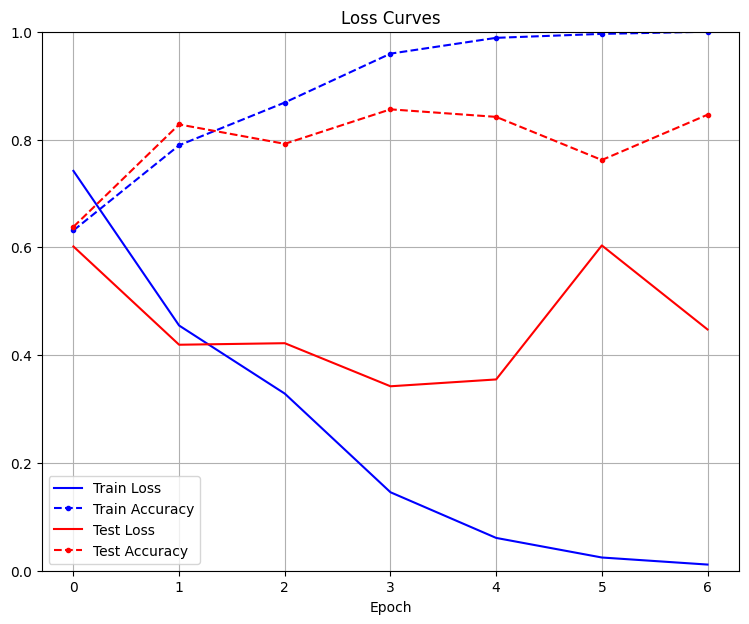

In [26]:
plot_loss_curves(model_one_h, model=model_one, test_data=test_data)

In [27]:
model_one.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Compare models
model_list = [dense_network, model_one]
for i in model_list:
  score = i.evaluate(test_data, verbose=False)
  metric = i.metrics_names[1].capitalize()
  print(f"Test Loss ({str(i.loss).split('.')[-1].split(' ')[0]}): {round(score[0], 3)}\n"
        f"Test Score ({metric}): {round(score[1], 3)}\n")

Test Loss (BinaryCrossentropy): 0.646
Test Score (Accuracy): 0.738

Test Loss (BinaryCrossentropy): 0.342
Test Score (Accuracy): 0.856



<u>**NOTE:**</u> model_one overfit the training data pretty bad, but had significantly less trainable parameters will improving on the score of the dense_network. Our next model should certainly involve some techniques to combat this overfitting.

### Model Two
We learned from model_one that we have a severe overfitting problem. So let's rebuild our baseline model but implement some regularization techniques. Let's implement and use the `tf.keras.layers.MaxPool2D()`

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Define the model
model_two = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_two.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

# 4. Fit the model
model_two_h = model_two.fit(train_data,
                            epochs=100,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/100
47/47 [==============================] - 9s 141ms/step - loss: 0.5968 - accuracy: 0.6713 - val_loss: 0.4515 - val_accuracy: 0.7880
Epoch 2/100
47/47 [==============================] - 6s 120ms/step - loss: 0.4327 - accuracy: 0.8000 - val_loss: 0.3590 - val_accuracy: 0.8460
Epoch 3/100
47/47 [==============================] - 6s 117ms/step - loss: 0.4028 - accuracy: 0.8260 - val_loss: 0.3285 - val_accuracy: 0.8640
Epoch 4/100
47/47 [==============================] - 7s 139ms/step - loss: 0.3839 - accuracy: 0.8280 - val_loss: 0.3362 - val_accuracy: 0.8640
Epoch 5/100
47/47 [==============================] - 6s 119ms/step - loss: 0.3572 - accuracy: 0.8520 - val_loss: 0.3087 - val_accuracy: 0.8640
Epoch 6/100
47/47 [==============================] - 5s 114ms/step - loss: 0.3262 - accuracy: 0.8647 - val_loss: 0.2788 - val_accuracy: 0.8760
Epoch 7/100
47/47 [==============================] - 6s 119ms/step - loss: 0.3642 - accuracy: 0.8440 - val_loss: 0.3342 - val_accuracy: 0.8560

Test Loss (BinaryCrossentropy): 0.279
Test Score (Accuracy): 0.876




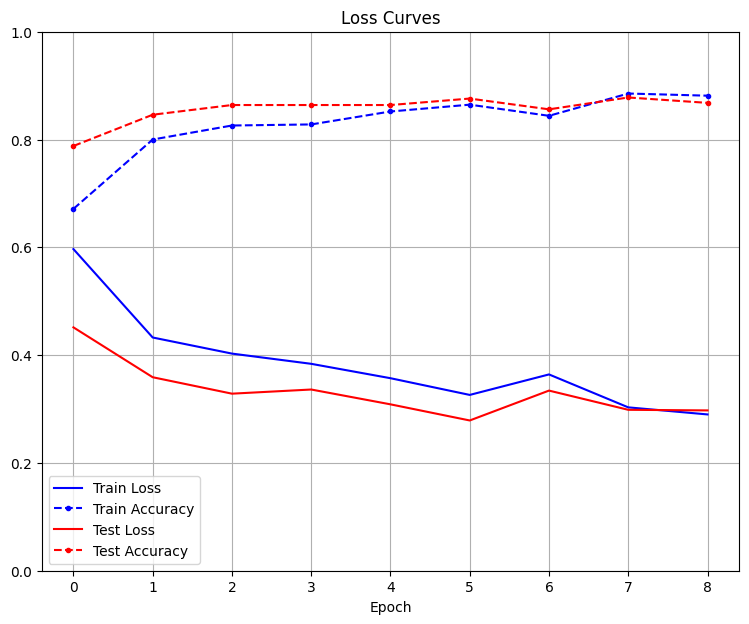

In [30]:
# Plot loss curves
plot_loss_curves(df=model_two_h, model=model_two, test_data=test_data)

In [31]:
model_two.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

**NOTE:** adding default pooling layers certainly handled our overfitting issue, and our number of parameters are much smaller so training will be a lot faster!

In [32]:
# Compare models
model_list = [dense_network, model_one, model_two]
for i in model_list:
  score = i.evaluate(test_data, verbose=False)
  metric = i.metrics_names[1].capitalize()
  print(f"Test Loss ({str(i.loss).split('.')[-1].split(' ')[0]}): {round(score[0], 3)}\n"
        f"Test Score ({metric}): {round(score[1], 3)}\n")

Test Loss (BinaryCrossentropy): 0.646
Test Score (Accuracy): 0.738

Test Loss (BinaryCrossentropy): 0.342
Test Score (Accuracy): 0.856

Test Loss (BinaryCrossentropy): 0.279
Test Score (Accuracy): 0.876



### Model Three
Implement data augmentation techniques

#### Data Augmentation

<u>Data Augmentation</u> is the process of artifically producing more records, or images, by altering them in a realistic way such as:
* Rotating the images
* Altering the brightness
* Flipping the images
* Zooming in on the images
* Etc.

This also (optionally) increases the training dataset which will increase the accuracy of the model alone, not to mention the realistic alterations that the model will now be able to learn.

#### Model Three
Now let's reinstantiate model_two but fit with the augmented data.

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Define the model
model_three = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_three.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

# 4. Fit the model
model_three_h = model_three.fit(train_data_aug,
                            epochs=100,
                            steps_per_epoch=len(train_data_aug),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/100
47/47 [==============================] - 23s 466ms/step - loss: 0.6865 - accuracy: 0.5327 - val_loss: 0.6510 - val_accuracy: 0.6620
Epoch 2/100
47/47 [==============================] - 22s 470ms/step - loss: 0.6207 - accuracy: 0.6460 - val_loss: 0.5089 - val_accuracy: 0.7520
Epoch 3/100
47/47 [==============================] - 23s 480ms/step - loss: 0.5552 - accuracy: 0.7140 - val_loss: 0.4450 - val_accuracy: 0.8060
Epoch 4/100
47/47 [==============================] - 22s 467ms/step - loss: 0.5100 - accuracy: 0.7527 - val_loss: 0.3901 - val_accuracy: 0.8240
Epoch 5/100
47/47 [==============================] - 22s 465ms/step - loss: 0.5144 - accuracy: 0.7440 - val_loss: 0.4272 - val_accuracy: 0.8160
Epoch 6/100
47/47 [==============================] - 22s 467ms/step - loss: 0.5111 - accuracy: 0.7513 - val_loss: 0.3848 - val_accuracy: 0.8400
Epoch 7/100
47/47 [==============================] - 22s 469ms/step - loss: 0.4892 - accuracy: 0.7833 - val_loss: 0.3706 - val_accuracy:

Test Loss (BinaryCrossentropy): 0.337
Test Score (Accuracy): 0.856




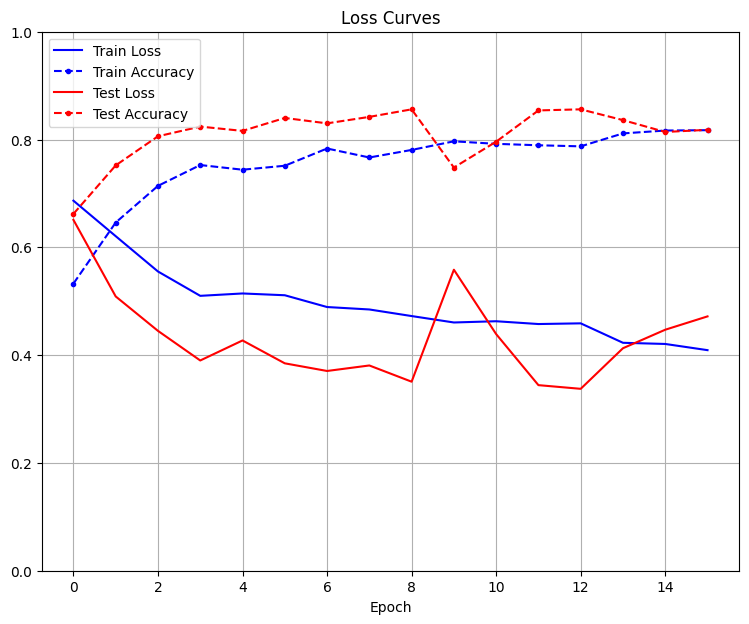

In [34]:
plot_loss_curves(df=model_three_h, model=model_three, test_data=test_data)

In [35]:
model_three.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

**NOTE:** each epoch on the augmented model takes longer because the images are being transformed as they go into the model, so the extra time is due to this preprocessing step.

In [36]:
# Compare models
model_list = [dense_network, model_one, model_two, model_three]
for i in model_list:
  score = i.evaluate(test_data, verbose=False)
  metric = i.metrics_names[1].capitalize()
  print(f"Test Loss ({str(i.loss).split('.')[-1].split(' ')[0]}): {round(score[0], 3)}\n"
        f"Test Score ({metric}): {round(score[1], 3)}\n")

Test Loss (BinaryCrossentropy): 0.646
Test Score (Accuracy): 0.738

Test Loss (BinaryCrossentropy): 0.342
Test Score (Accuracy): 0.856

Test Loss (BinaryCrossentropy): 0.279
Test Score (Accuracy): 0.876

Test Loss (BinaryCrossentropy): 0.337
Test Score (Accuracy): 0.856



### Model Four
Let's use the super data train/test sets made in the preprocessing section of this notebook.

In [37]:
# Set random seed
tf.random.set_seed(42)

# 1. Define the model
model_four = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_four.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
]

# 4. Fit the model
model_four_h = model_four.fit(supertrain_data,
                            epochs=100,
                            steps_per_epoch=len(supertrain_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/100
94/94 [==============================] - 10s 97ms/step - loss: 0.5463 - accuracy: 0.7223 - val_loss: 0.3612 - val_accuracy: 0.8580
Epoch 2/100
94/94 [==============================] - 8s 84ms/step - loss: 0.4417 - accuracy: 0.8000 - val_loss: 0.3246 - val_accuracy: 0.8580
Epoch 3/100
94/94 [==============================] - 8s 87ms/step - loss: 0.4147 - accuracy: 0.8187 - val_loss: 0.3016 - val_accuracy: 0.8840
Epoch 4/100
94/94 [==============================] - 9s 101ms/step - loss: 0.4090 - accuracy: 0.8280 - val_loss: 0.3051 - val_accuracy: 0.8840
Epoch 5/100
94/94 [==============================] - 9s 94ms/step - loss: 0.3740 - accuracy: 0.8397 - val_loss: 0.3278 - val_accuracy: 0.8420
Epoch 6/100
94/94 [==============================] - 9s 94ms/step - loss: 0.3791 - accuracy: 0.8400 - val_loss: 0.3239 - val_accuracy: 0.8680
Epoch 7/100
94/94 [==============================] - 9s 90ms/step - loss: 0.3459 - accuracy: 0.8607 - val_loss: 0.2807 - val_accuracy: 0.8940
Epoc

Test Loss (BinaryCrossentropy): 0.259
Test Score (Accuracy): 0.898




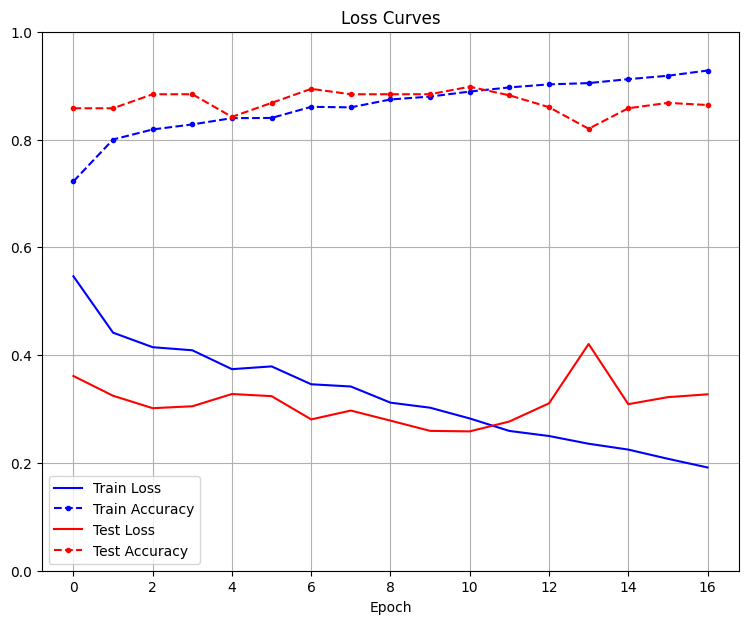

In [38]:
plot_loss_curves(model_four_h, model_four, test_data=test_data)

In [39]:
model_four.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 10)       

In [40]:
# Compare models
model_list = [dense_network, model_one, model_two, model_three, model_four]
for i in model_list:
  score = i.evaluate(test_data, verbose=False)
  metric = i.metrics_names[1].capitalize()
  print(f"Test Loss ({str(i.loss).split('.')[-1].split(' ')[0]}): {round(score[0], 3)}\n"
        f"Test Score ({metric}): {round(score[1], 3)}\n")

Test Loss (BinaryCrossentropy): 0.646
Test Score (Accuracy): 0.738

Test Loss (BinaryCrossentropy): 0.342
Test Score (Accuracy): 0.856

Test Loss (BinaryCrossentropy): 0.279
Test Score (Accuracy): 0.876

Test Loss (BinaryCrossentropy): 0.337
Test Score (Accuracy): 0.856

Test Loss (BinaryCrossentropy): 0.259
Test Score (Accuracy): 0.898



### Model Five - Tiny VGG

In [41]:
# Set random seed
tf.random.set_seed(42)

# 1. Define our model (same as the Tiny VGG on the CNN explainer website)
model_tiny = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name="Tiny_VGG_Model")

# 2. Compile our model
model_tiny.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

# 4. Fit the model
model_tiny_h = model_tiny.fit(train_data,
                            epochs=100,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/100
47/47 [==============================] - 9s 146ms/step - loss: 0.6255 - accuracy: 0.6480 - val_loss: 0.5087 - val_accuracy: 0.7660
Epoch 2/100
47/47 [==============================] - 6s 128ms/step - loss: 0.4983 - accuracy: 0.7713 - val_loss: 0.4022 - val_accuracy: 0.8240
Epoch 3/100
47/47 [==============================] - 8s 165ms/step - loss: 0.4507 - accuracy: 0.7973 - val_loss: 0.3743 - val_accuracy: 0.8480
Epoch 4/100
47/47 [==============================] - 7s 138ms/step - loss: 0.3762 - accuracy: 0.8420 - val_loss: 0.3007 - val_accuracy: 0.8800
Epoch 5/100
47/47 [==============================] - 7s 152ms/step - loss: 0.3328 - accuracy: 0.8560 - val_loss: 0.2900 - val_accuracy: 0.8940
Epoch 6/100
47/47 [==============================] - 6s 126ms/step - loss: 0.2568 - accuracy: 0.9047 - val_loss: 0.3083 - val_accuracy: 0.8820
Epoch 7/100
47/47 [==============================] - 6s 137ms/step - loss: 0.1875 - accuracy: 0.9340 - val_loss: 0.3161 - val_accuracy: 0.8820

Test Loss (binary_crossentropy): 0.29
Test Score (Accuracy): 0.894




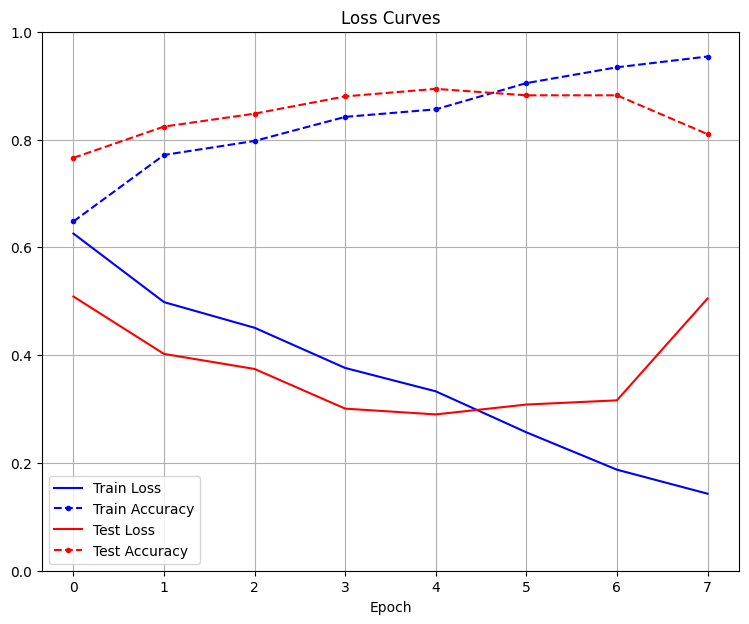

In [42]:
plot_loss_curves(df=model_tiny_h, model=model_tiny, test_data=test_data)

In [43]:
model_tiny.summary()

Model: "Tiny_VGG_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                              

In [44]:
# Compare models
model_list = [dense_network, model_one, model_two, model_three, model_four, model_tiny]
for i in model_list:
  score = i.evaluate(test_data, verbose=False)
  metric = i.metrics_names[1].capitalize()
  print(f"Test Loss ({str(i.loss).split('.')[-1].split(' ')[0]}): {round(score[0], 3)}\n"
        f"Test Score ({metric}): {round(score[1], 3)}\n")

Test Loss (BinaryCrossentropy): 0.646
Test Score (Accuracy): 0.738

Test Loss (BinaryCrossentropy): 0.342
Test Score (Accuracy): 0.856

Test Loss (BinaryCrossentropy): 0.279
Test Score (Accuracy): 0.876

Test Loss (BinaryCrossentropy): 0.337
Test Score (Accuracy): 0.856

Test Loss (BinaryCrossentropy): 0.259
Test Score (Accuracy): 0.898

Test Loss (binary_crossentropy): 0.29
Test Score (Accuracy): 0.894



`model_four` is the <u>**WINNER**</u>

In [45]:
# Save the model so we don't have to retrain if the notebook dies
model_four.save("pizza_steak_model.keras")

## Import and Predict on a Custom Image

In [46]:
# Download an image of steak (found on google images)
!wget https://www.lemonblossoms.com/wp-content/uploads/2018/05/Pan_Seared_Steak_Recipe_S3.jpg

--2024-02-01 14:34:05--  https://www.lemonblossoms.com/wp-content/uploads/2018/05/Pan_Seared_Steak_Recipe_S3.jpg
Resolving www.lemonblossoms.com (www.lemonblossoms.com)... 104.21.81.183, 172.67.163.96, 2606:4700:3032::ac43:a360, ...
Connecting to www.lemonblossoms.com (www.lemonblossoms.com)|104.21.81.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271356 (265K) [image/jpeg]
Saving to: ‘Pan_Seared_Steak_Recipe_S3.jpg’

Pan_Seared_Steak_Re 100%[===================>] 265.00K   243KB/s    in 1.1s    

2024-02-01 14:34:08 (243 KB/s) - ‘Pan_Seared_Steak_Recipe_S3.jpg’ saved [271356/271356]



(-0.5, 1199.5, 1199.5, -0.5)

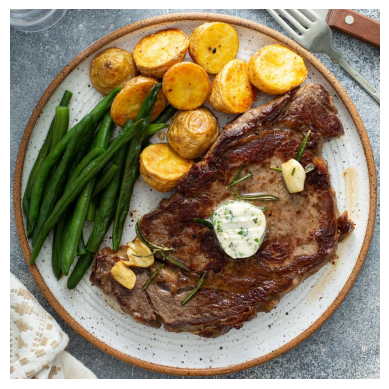

In [47]:
# View our example
steak = mpimg.imread("/content/Pan_Seared_Steak_Recipe_S3.jpg")
plt.imshow(steak)
plt.axis(False)

In [48]:
# Check the shape, remember needs to in the shape (224, 224, 3)
steak.shape

(1200, 1200, 3)

In [49]:
prepped_steak = load_and_prep("/content/Pan_Seared_Steak_Recipe_S3.jpg", 224)
prepped_steak.shape

TensorShape([224, 224, 3])

(-0.5, 223.5, 223.5, -0.5)

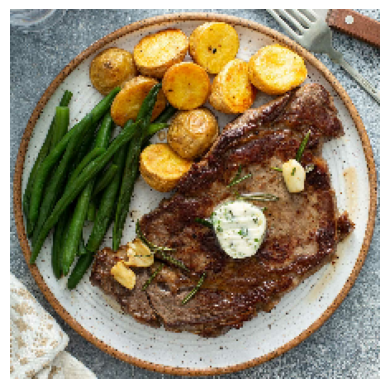

In [50]:
plt.imshow(prepped_steak)
plt.axis(False)

In [51]:
# Load in our model
best_model = tf.keras.models.load_model('pizza_steak_model.keras')

In [52]:
# Remember that classification models predict probability
pred = best_model.predict(tf.expand_dims(prepped_steak, axis=0))
pred

1/1 [==============================] - 0s 243ms/step


array([[0.914197]], dtype=float32)

In [53]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [54]:
# We can index the predicted class by rounding the prediction probability against our class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

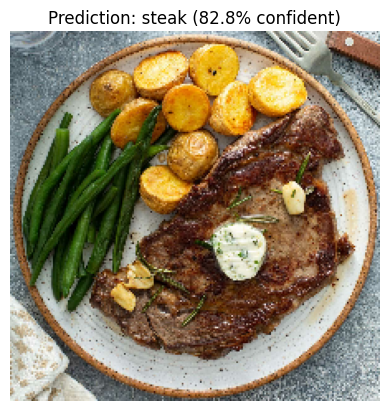

In [55]:
pred_and_plot(best_model, "/content/Pan_Seared_Steak_Recipe_S3.jpg", class_names=class_names)

<u>**BOOM!!!**</u>

--2024-02-01 14:34:09--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyy51o71dz32QnmDMx4N9rGijzNK5Nrw9YAA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.24.100, 74.125.24.139, 74.125.24.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.24.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9350 (9.1K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRyy51o71dz32QnmDMx4N9rGijzNK5Nrw9YAA’

images?q=tbn:ANd9Gc 100%[===================>]   9.13K  --.-KB/s    in 0s      

2024-02-01 14:34:09 (66.6 MB/s) - ‘images?q=tbn:ANd9GcRyy51o71dz32QnmDMx4N9rGijzNK5Nrw9YAA’ saved [9350/9350]



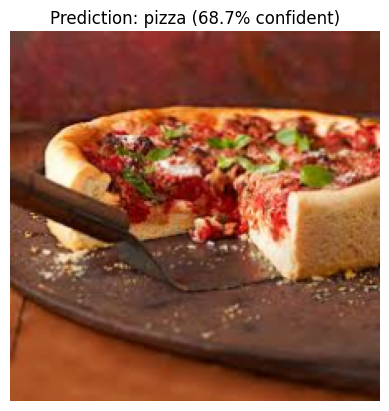

In [56]:
# Let's load in a picture of pizza and use our functions to preprocess and predict the image class
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyy51o71dz32QnmDMx4N9rGijzNK5Nrw9YAA&usqp=CAU

pred_and_plot(best_model, "/content/images?q=tbn:ANd9GcRyy51o71dz32QnmDMx4N9rGijzNK5Nrw9YAA", class_names=class_names)

<u>**DOUBLE BOOM!!!**</u>

(-0.5, 224.5, 224.5, -0.5)

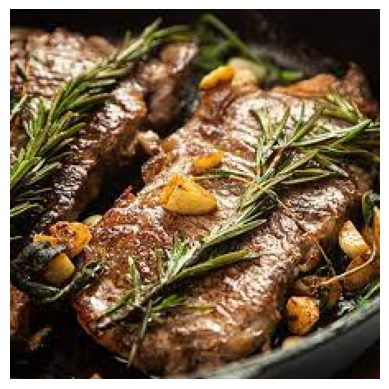

In [63]:
# View custom image
steak = mpimg.imread("/content/steak_pic.jpeg")
plt.imshow(steak)
plt.axis(False)

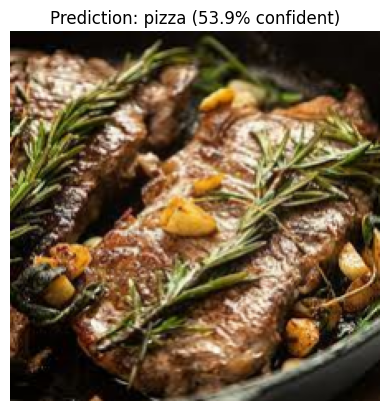

In [65]:
pred_and_plot(best_model, "/content/steak_pic.jpeg", class_names=class_names)

Oh no! This prediction is clearly wrong! The model is 89% accurate, so this picture must represent the 11% the model predicts incorrectly.

We could have some guesses as to why this prediction was wrong, such as, there may not be many pictures of steak with toppings on top of them in the training dataset. It's likely the model got confused with the rosemary and garlic on top and predicted it was a pizza because it thought those were toppings. To improve this model, we could keep training and include pictures of steak with toppings on top of them.

# Multi-Class Classification
Let's advance past a binary classification problem (pizza vs. steak) and create a multi-class classifiction model for ten different types of food.

## Gather the Data

In [66]:
# Import
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-02-01 14:51:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.2MB/s    in 25s     

2024-02-01 14:52:15 (19.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [67]:
# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()

## Exploratory Data Analysis (EDA)

In [68]:
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 1

In [69]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [70]:
# Get the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image and shape: '2891741.jpg', (512, 512, 3)



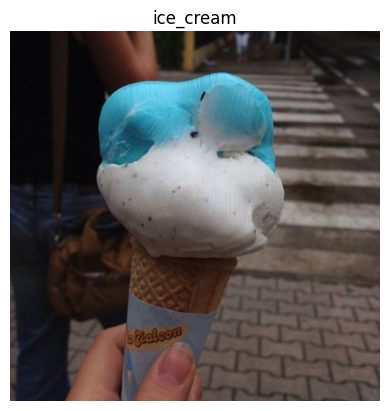

In [71]:
# View some random images
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))
img

## Preprocess Image Data

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True,
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [73]:
# Recreate ImageDataGenerator training instance
train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                       rotation_range=0.2,
                                       shear_range=0.5,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True
                                       )
# Create ImageDataGenerator test instance without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
#
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                       shuffle=True,
                                                      )

Found 7500 images belonging to 10 classes.


## Multi-Class Modeling
Below is a collapsable section for all the modeling experiments we will run on the multi-class dataset.

### Baseline Model

In [74]:
# Set random seed
tf.random.set_seed(42)

# 1. Define the model
model_two = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# 2. Compile the model
model_two.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

# 4. Fit the model
model_two_h = model_two.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/5
235/235 [==============================] - 31s 125ms/step - loss: 2.1784 - accuracy: 0.1915 - val_loss: 2.0635 - val_accuracy: 0.2500
Epoch 2/5
235/235 [==============================] - 32s 136ms/step - loss: 1.9555 - accuracy: 0.3147 - val_loss: 1.9068 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.7588 - accuracy: 0.4007 - val_loss: 1.8703 - val_accuracy: 0.3504
Epoch 4/5
235/235 [==============================] - 31s 134ms/step - loss: 1.5108 - accuracy: 0.4855 - val_loss: 2.0007 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 1.2470 - accuracy: 0.5863 - val_loss: 2.0880 - val_accuracy: 0.3344


Test Loss (CategoricalCrossentropy): 2.088
Test Score (Accuracy): 0.334




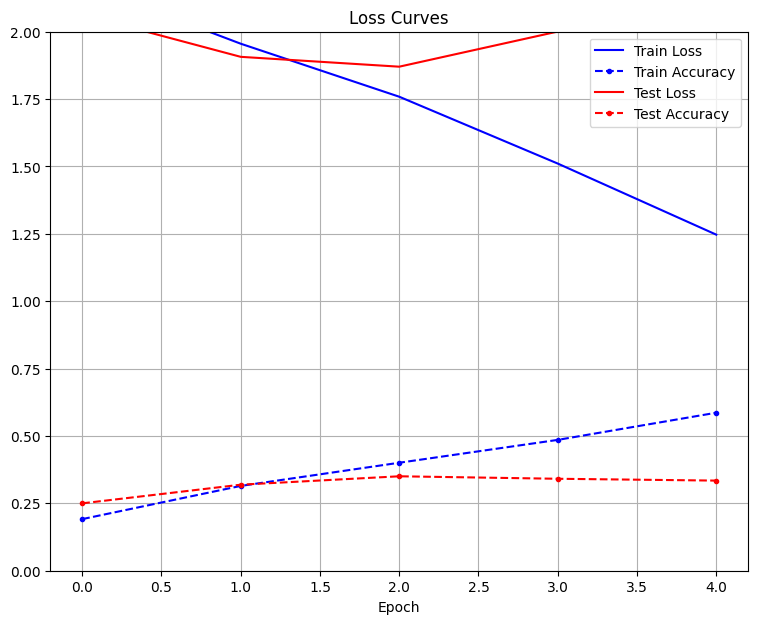

In [75]:
# Plot loss curves
plot_loss_curves(df=model_two_h, model=model_two, test_data=test_data, y_lim=(0, 2))

#### Reducing Overfitting
We can combat overfitting in image recognition by...
* **Getting more data** - having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model. One way to simplify is to reduce the number of filters, layers, add more pooling layers, etc.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

### MC Model One
Let's update our baseline by increasing the pool size of our max pooling layers.

In [76]:
# Set random seed
tf.random.set_seed(42)

# 1. Define the model
mc_model_one = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# 2. Compile the model
mc_model_one.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

# 4. Fit the model
mc_model_one_h = mc_model_one.fit(train_data,
                            epochs=100,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/100
235/235 [==============================] - 30s 120ms/step - loss: 2.1591 - accuracy: 0.2065 - val_loss: 2.0189 - val_accuracy: 0.2820
Epoch 2/100
235/235 [==============================] - 32s 137ms/step - loss: 1.9709 - accuracy: 0.3029 - val_loss: 1.9396 - val_accuracy: 0.3036
Epoch 3/100
235/235 [==============================] - 29s 124ms/step - loss: 1.8788 - accuracy: 0.3476 - val_loss: 1.8530 - val_accuracy: 0.3424
Epoch 4/100
235/235 [==============================] - 29s 123ms/step - loss: 1.8356 - accuracy: 0.3637 - val_loss: 1.8785 - val_accuracy: 0.3348
Epoch 5/100
235/235 [==============================] - 33s 140ms/step - loss: 1.7878 - accuracy: 0.3840 - val_loss: 1.7898 - val_accuracy: 0.3664
Epoch 6/100
235/235 [==============================] - 33s 143ms/step - loss: 1.7588 - accuracy: 0.4019 - val_loss: 1.7878 - val_accuracy: 0.3740
Epoch 7/100
235/235 [==============================] - 29s 122ms/step - loss: 1.7186 - accuracy: 0.4156 - val_loss: 1.7430 -

Test Loss (CategoricalCrossentropy): 1.623
Test Score (Accuracy): 0.439




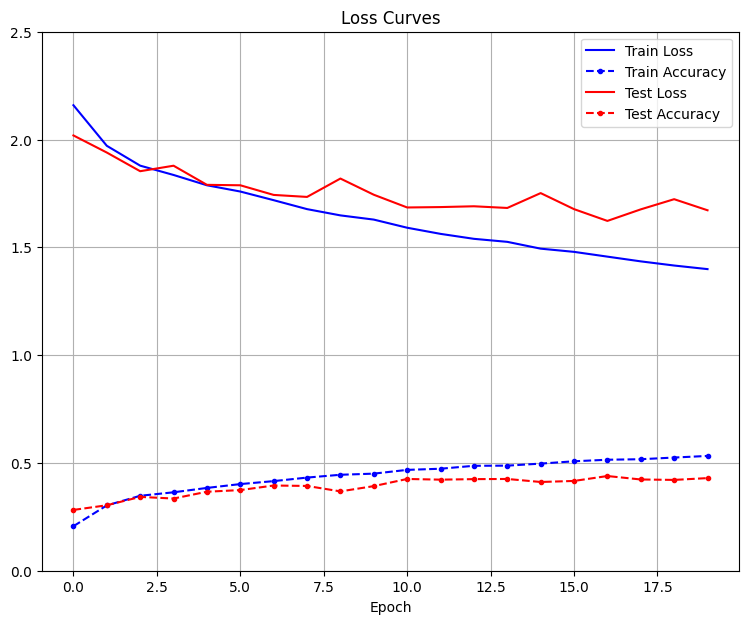

In [77]:
plot_loss_curves(mc_model_one_h, mc_model_one, test_data=test_data, y_lim=(0, 2.5))

Look at that! Increasing the `pool_size` parameter in each pooling layer reduced overfitting and improved the test evaluation metrics!

## MC Model Two

In [78]:
# Set random seed
tf.random.set_seed(42)

# 1. Define the model
mc_model_two = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# 2. Compile the model
mc_model_two.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# 3. Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

# 4. Fit the model
mc_model_two_h = mc_model_two.fit(train_data_aug,
                            epochs=100,
                            steps_per_epoch=len(train_data_aug),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=callbacks
                            )

Epoch 1/100
235/235 [==============================] - 110s 459ms/step - loss: 2.2653 - accuracy: 0.1443 - val_loss: 2.1617 - val_accuracy: 0.2032
Epoch 2/100
235/235 [==============================] - 112s 474ms/step - loss: 2.1758 - accuracy: 0.2025 - val_loss: 2.0690 - val_accuracy: 0.2536
Epoch 3/100
235/235 [==============================] - 111s 473ms/step - loss: 2.1082 - accuracy: 0.2404 - val_loss: 1.9672 - val_accuracy: 0.3036
Epoch 4/100
235/235 [==============================] - 111s 472ms/step - loss: 2.0240 - accuracy: 0.2855 - val_loss: 1.8643 - val_accuracy: 0.3420
Epoch 5/100
235/235 [==============================] - 112s 475ms/step - loss: 1.9765 - accuracy: 0.3084 - val_loss: 1.8258 - val_accuracy: 0.3796
Epoch 6/100
235/235 [==============================] - 110s 468ms/step - loss: 1.9555 - accuracy: 0.3131 - val_loss: 1.8293 - val_accuracy: 0.3652
Epoch 7/100
235/235 [==============================] - 110s 470ms/step - loss: 1.9448 - accuracy: 0.3271 - val_loss: 1

Test Loss (CategoricalCrossentropy): 1.613
Test Score (Accuracy): 0.466




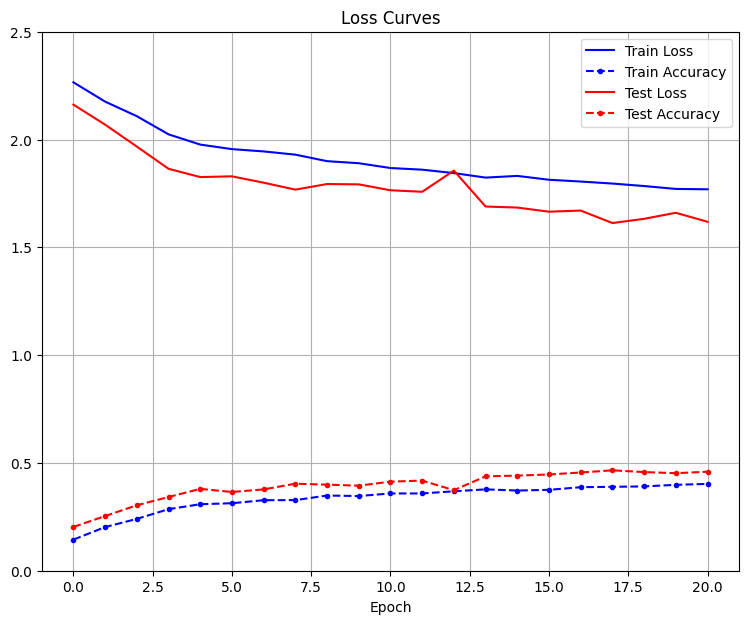

In [79]:
plot_loss_curves(mc_model_two_h, mc_model_two, test_data=test_data, y_lim=(0, 2.5))

In [80]:
# Evalute our models so far
model_list = [model_two, mc_model_one, mc_model_two]
for i in model_list:
  score = i.evaluate(test_data, verbose=False)
  metric = i.metrics_names[1].capitalize()
  print(f"Test Loss ({str(i.loss).split('.')[-1].split(' ')[0]}): {round(score[0], 3)}\n"
        f"Test Score ({metric}): {round(score[1], 3)}\n")

Test Loss (CategoricalCrossentropy): 2.088
Test Score (Accuracy): 0.334

Test Loss (CategoricalCrossentropy): 1.623
Test Score (Accuracy): 0.439

Test Loss (CategoricalCrossentropy): 1.613
Test Score (Accuracy): 0.466



<u>**NOTE:**</u> Probably set the early stopping too short as this model is actually underfitting the data. It's  very long process of training, so will stop here.

## Make Predictions With the Multi-Class Model

In [81]:
# Let's import an image from google
!wget https://www.justonecookbook.com/wp-content/uploads/2020/01/Sushi-Rolls-Maki-Sushi-%E2%80%93-Hosomaki-1106-II.jpg

--2024-02-01 15:50:58--  https://www.justonecookbook.com/wp-content/uploads/2020/01/Sushi-Rolls-Maki-Sushi-%E2%80%93-Hosomaki-1106-II.jpg
Resolving www.justonecookbook.com (www.justonecookbook.com)... 172.67.22.245, 104.22.51.139, 104.22.50.139, ...
Connecting to www.justonecookbook.com (www.justonecookbook.com)|172.67.22.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166212 (162K) [image/jpeg]
Saving to: ‘Sushi-Rolls-Maki-Sushi-–-Hosomaki-1106-II.jpg’

Sushi-Rolls-Maki-Su 100%[===================>] 162.32K  --.-KB/s    in 0.005s  

2024-02-01 15:50:58 (34.3 MB/s) - ‘Sushi-Rolls-Maki-Sushi-–-Hosomaki-1106-II.jpg’ saved [166212/166212]



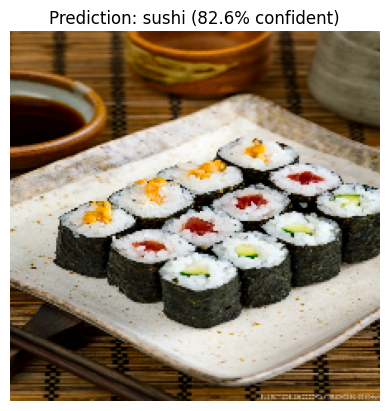

In [82]:
pred_and_plot(mc_model_two, "/content/Sushi-Rolls-Maki-Sushi-–-Hosomaki-1106-II.jpg", class_names=class_names)